# Hydrophobicity Plot

This is a simple tutorial to generate a hydrophobicity plot of a protein sequence using [Biopython](https://github.com/biopython/biopython) through [Google Colab Notebook](https://colab.research.google.com/).

## Setup Platform

Installing **Biopython**

In [1]:
try:
    import google.colab
    !pip install biopython
except ImportError:
    pass

Importing Required Packages

In [2]:
import os
import sys
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
from Bio import SeqIO

Input Protein Sequence

In [3]:
seq = 'Q9UKY0.fasta'
url = ('https://raw.githubusercontent.com/AshokHub/Datasets/main/Q9UKY0.fasta')
if not os.path.exists(seq):
    urlretrieve(url, seq)

## Computing Hydrophobicity Plot

Parsing protein sequence ID, raw sequence, and length of the protein sequence from the FASTA file

In [4]:
for record in SeqIO.parse(seq, 'fasta'):
    id = record.id # Sequence ID
    seq = record.seq # Raw sequence
    n = len(seq) # Length of the sequence

Kyte-Doolittle Matrix

In [5]:
kd = { 'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
       'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
       'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
       'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2 }

Assigning *x*, *y* axis values for 2D plot

In [6]:
x = range(1, n+1)
y = []
for res in seq:
    y.append(kd[res])

Generating 2D hydrophobicity plot

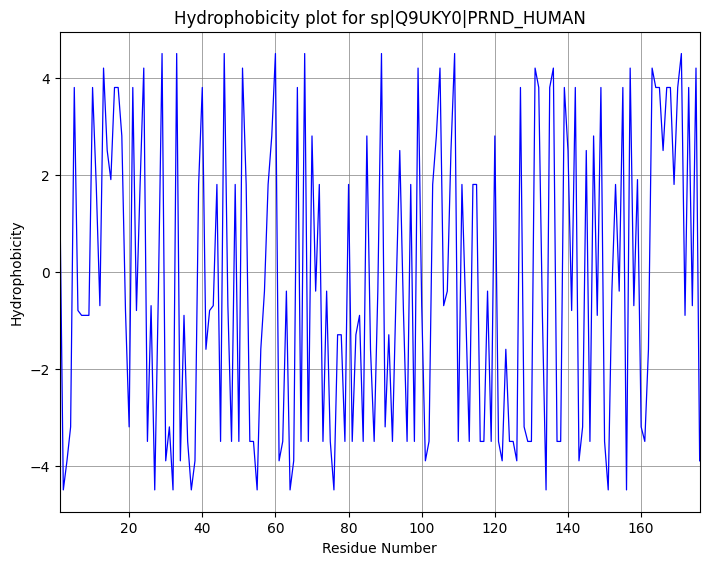

In [18]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, 'b', lw = 0.9)
ax.set_xlim(1, n)
ax.set(xlabel = 'Residue Number', ylabel = 'Hydrophobicity', title = 'Hydrophobicity plot for ' + id)
ax.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
plt.show()